In [0]:
# 데이터 활용에 필요한 기본 패키지 로딩

import sys #access to system parameters 
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import tensorflow as tf
print("tensorflow version: {}".format(tf.__version__))

import keras
print("keras version: {}".format(keras.__version__))

import os
#import io

Python version: 3.5.4 |Anaconda custom (64-bit)| (default, Nov  8 2017, 14:34:30) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.22.0
scikit-learn version: 0.20.0
NumPy version: 1.14.2


D:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tensorflow version: 1.7.0
keras version: 2.1.6


Using TensorFlow backend.


In [0]:
#데이터 전처리 관련 라이브러리 로드
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit

#모델 알고리즘 로드
from sklearn import svm, tree
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Deep Learning Model 로드
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
from keras.wrappers.scikit_learn import KerasClassifier

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#HyperParameter Tuning을 위한 라이브러리 로드
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#모델 평가를 위한 라이브러리 로드
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn import model_selection

#수학 & 통계 관련 라이브러리 로드
import scipy.stats as st
from collections import Counter

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# File Read from CSV
col_names = list(map(lambda x: "A"+str(x), [i for i in range(16)]))
dataset = pd.read_csv('./crx.data.txt', names = col_names, header = None)

#데이터 load
print("type is: ", type(dataset), "shape is : ",dataset.shape)
dataset.head()

type is:  <class 'pandas.core.frame.DataFrame'> shape is :  (690, 16)


,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [0]:
# 컬럼명 변경
dataset.rename(columns={'A0':'Male','A1':'Age','A2':'Debt','A3':'Married','A4':'BankCustomer','A5':'EducationLevel','A6':'Ethnicity','A7':'YearsEmployed','A8':'PriorDefault',
               'A9':'Employed','A10':'CreditScore','A11':'DriversLicense','A12':'Citizen','A13':'ZipCode','A14':'Income','A15':'Approved'}, inplace=True)
dataset.sample(5)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
410,b,31.25,2.835,u,g,ff,ff,0.000,f,t,5,f,g,00176,146,-
488,b,18.83,3.540,y,p,ff,ff,0.000,f,f,0,t,g,00180,1,-
594,b,38.67,0.210,u,g,k,v,0.085,t,f,0,t,g,00280,0,+
201,a,41.33,1.000,u,g,i,bb,2.250,t,f,0,t,g,00000,300,+
555,b,41.92,0.420,u,g,c,h,0.210,t,t,6,f,g,00220,948,+


In [0]:
# 변수 고유값 출력 - 군데군데 ? 마크가 들어가 있음
for col in dataset.columns: 
    # Find the unique elements of an array. Returns the sorted unique elements of an array
    uniq = np.unique(dataset[col].astype(str)) # data cast to string type
    print('-' * 50)
    print('# col {}, n_uniq {}, uniq {}, dtype {}'.format(col, len(dataset[col].unique()), dataset[col].unique(), dataset[col].dtype))

--------------------------------------------------
# col Male, n_uniq 3, uniq ['b' 'a' '?'], dtype object
--------------------------------------------------
# col Age, n_uniq 350, uniq ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75'

In [0]:
# Replace Question Marks with NAN in Dataframe values
dataset.replace('?',np.nan,inplace=True)
dataset['Approved'].replace({'+': 1, '-': 0},inplace=True)
print(dataset['Approved'].unique())

[1 0]


In [0]:
# 연속형 변수로 변경
change_col = ['Age', 'Debt', 'YearsEmployed', 'Income']

for i in change_col:
  dataset[i] = pd.to_numeric(dataset[i], errors='coerce')

dataset.tail()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,0
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,0


In [0]:
# Null값이 있는 컬럼 체크 후 Null 개수 출력
for col in dataset:
   if dataset[col].isnull().sum() > 0:
      print("column: {:20} \t # of null value {:3} \t dtype {}".format(col, dataset[col].isnull().sum(), dataset[col].dtype))

column: Male                 	 # of null value  12 	 dtype object
column: Age                  	 # of null value  12 	 dtype float64
column: Married              	 # of null value   6 	 dtype object
column: BankCustomer         	 # of null value   6 	 dtype object
column: EducationLevel       	 # of null value   9 	 dtype object
column: Ethnicity            	 # of null value   9 	 dtype object
column: ZipCode              	 # of null value  13 	 dtype object


In [0]:
# Missing Value 채우기 - 연속형 변수(중앙값)
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].median())

# Missing Value 채우기 - 범주형 변수(최빈값)
null_cat_cols = ['Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'ZipCode']
for col in null_cat_cols:
  dataset[col].fillna(dataset[col].mode()[0], inplace = True)

In [0]:
# Double Check in Fill Null Values
for col in dataset:
  print("column: {:18} \t # of null value {:3} \t dtype {}".format(col, dataset[col].isnull().sum(), dataset[col].dtype))

column: Male               	 # of null value   0 	 dtype object
column: Age                	 # of null value   0 	 dtype float64
column: Debt               	 # of null value   0 	 dtype float64
column: Married            	 # of null value   0 	 dtype object
column: BankCustomer       	 # of null value   0 	 dtype object
column: EducationLevel     	 # of null value   0 	 dtype object
column: Ethnicity          	 # of null value   0 	 dtype object
column: YearsEmployed      	 # of null value   0 	 dtype float64
column: PriorDefault       	 # of null value   0 	 dtype object
column: Employed           	 # of null value   0 	 dtype object
column: CreditScore        	 # of null value   0 	 dtype int64
column: DriversLicense     	 # of null value   0 	 dtype object
column: Citizen            	 # of null value   0 	 dtype object
column: ZipCode            	 # of null value   0 	 dtype object
column: Income             	 # of null value   0 	 dtype int64
column: Approved           	 # of null 

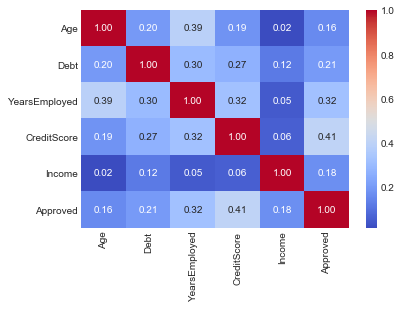

In [0]:
# 수치형변수들과 Survived 변수의 상관관계 Matrix 시각화
g = sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

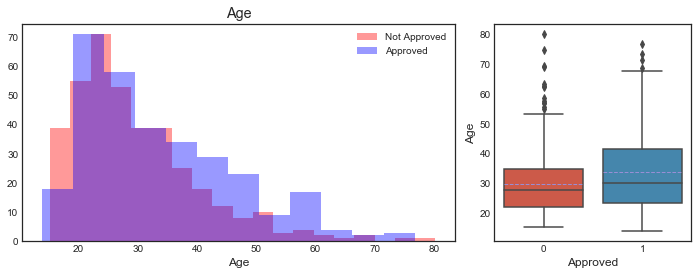

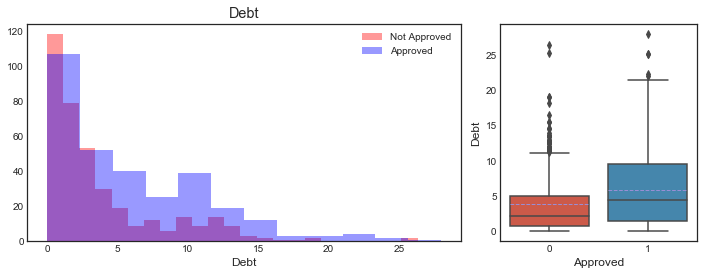

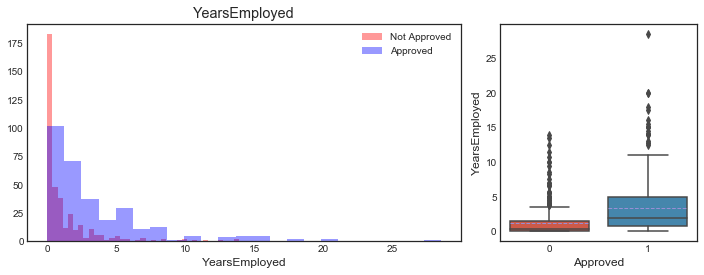

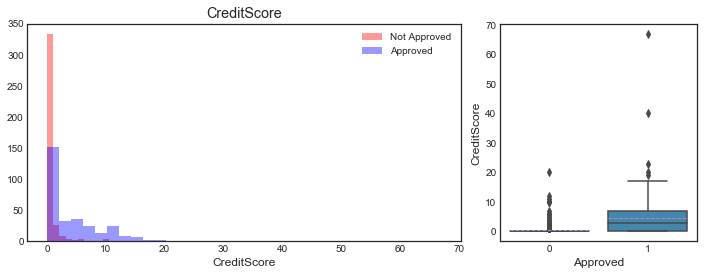

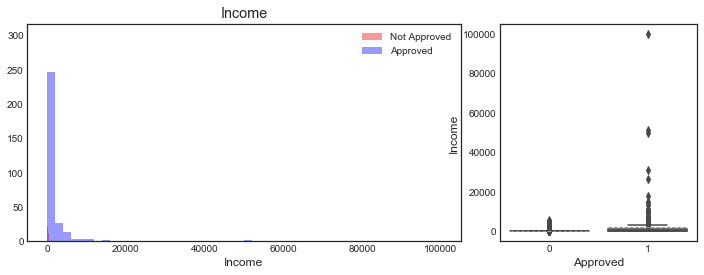

In [0]:
# 변수별 변수 분포 그래프(left) & Box Plot(right)
# Numeric value들을 가진 columns들 List로 만들고 1행당 그래프를 그린다
# Plot distributions of Approval or Not Approval
num_cols = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']

for i in num_cols:
  plt.figure(figsize = (12,4))
  grid_size = (1,3)
  
  ax1 = plt.subplot2grid(grid_size, (0, 0), colspan=2)
  ax2 = plt.subplot2grid(grid_size, (0, 2))
  
  g = sns.distplot(dataset[i][(dataset["Approved"] == 0) & (dataset[i].notnull())], ax=ax1, kde=False, color="Red")
  g = sns.distplot(dataset[i][(dataset["Approved"] == 1) & (dataset[i].notnull())], ax=g, kde=False, color="Blue")
  
  g.set_title(i)
  g = g.legend(["Not Approved","Approved"])
 
  sns.boxplot(y=dataset[i], x=dataset["Approved"], showmeans = True, meanline = True, ax = ax2)

  plt.show() 

In [0]:
# Feature Engineering의 일환으로 Log 값 취한 뒤 Normalization을 하여 변수명 + LN (lognorm)으로 열 추가 후 그래프 다시 그림
num_cols = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
num_ln_cols = list(map(lambda x: str(x)+"_LN", num_cols))

num_pipeline = Pipeline([
        ('log_scaler', FunctionTransformer(np.log1p, validate=True)), # pipeline 내 log transformation을 위해 Function Transfomer 사용
        ('normalizer', MinMaxScaler()),
    ])

piped_np = num_pipeline.fit_transform(dataset[num_cols])
piped_df = pd.DataFrame(piped_np, columns=num_ln_cols)

dataset_fe = pd.concat([dataset, piped_df], axis=1)
dataset_fe.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,...,DriversLicense,Citizen,ZipCode,Income,Approved,Age_LN,Debt_LN,YearsEmployed_LN,CreditScore_LN,Income_LN
0,b,30.83,0.000,u,g,w,v,1.25,t,t,...,f,g,00202,0,1,0.450783,0.000000,0.239609,0.164272,0.000000
1,a,58.67,4.460,u,g,q,h,3.04,t,t,...,f,g,00043,560,1,0.819080,0.504099,0.412554,0.461170,0.549792
2,a,24.50,0.500,u,g,q,h,1.50,t,f,...,f,g,00280,824,1,0.320834,0.120413,0.270740,0.000000,0.583290
3,b,27.83,1.540,u,g,w,v,3.75,t,t,...,t,g,00100,3,1,0.392767,0.276829,0.460392,0.424637,0.120412
4,b,20.17,5.625,u,g,w,v,1.71,t,f,...,f,s,00120,0,1,0.211771,0.561534,0.294573,0.000000,0.000000


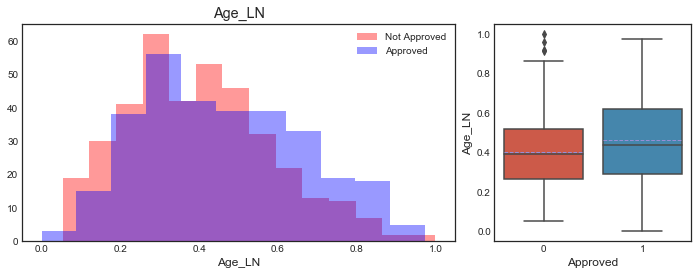

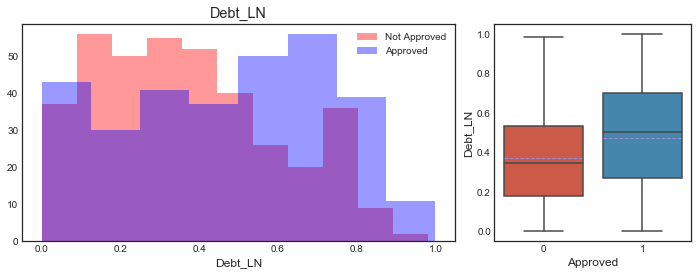

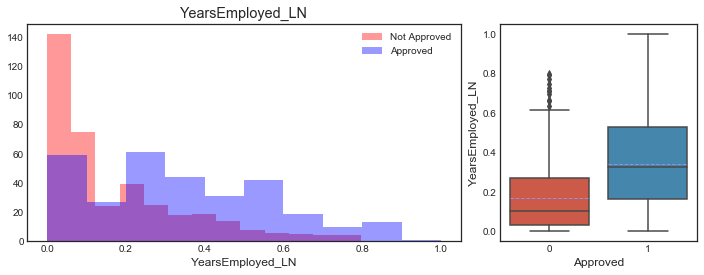

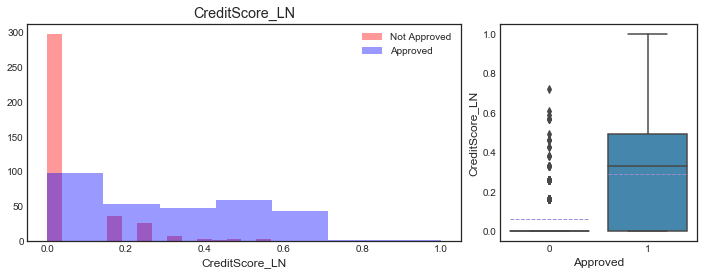

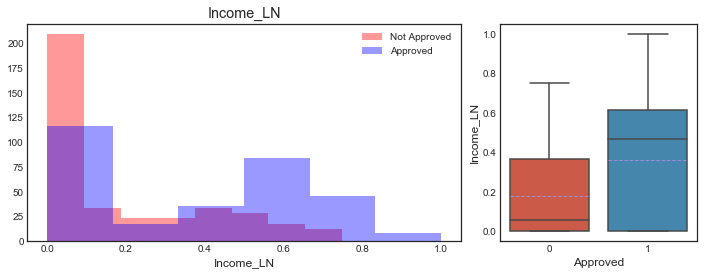

In [0]:
num_ln_cols = ['Age_LN', 'Debt_LN', 'YearsEmployed_LN', 'CreditScore_LN', 'Income_LN']

for i in num_ln_cols:
  plt.figure(figsize = (12,4))
  grid_size = (1,3)
  
  ax1 = plt.subplot2grid(grid_size, (0, 0), colspan=2)
  ax2 = plt.subplot2grid(grid_size, (0, 2))
  
  g = sns.distplot(dataset_fe[i][(dataset_fe["Approved"] == 0) & (dataset_fe[i].notnull())], ax=ax1, color="Red", kde = False)
  g = sns.distplot(dataset_fe[i][(dataset_fe["Approved"] == 1) & (dataset_fe[i].notnull())], ax=g, color="Blue", kde = False)
  g.set_title(i)
  g = g.legend(["Not Approved","Approved"])
  sns.boxplot(y=dataset_fe[i], x=dataset_fe["Approved"], showmeans = True, meanline = True, ax = ax2)

  plt.show()

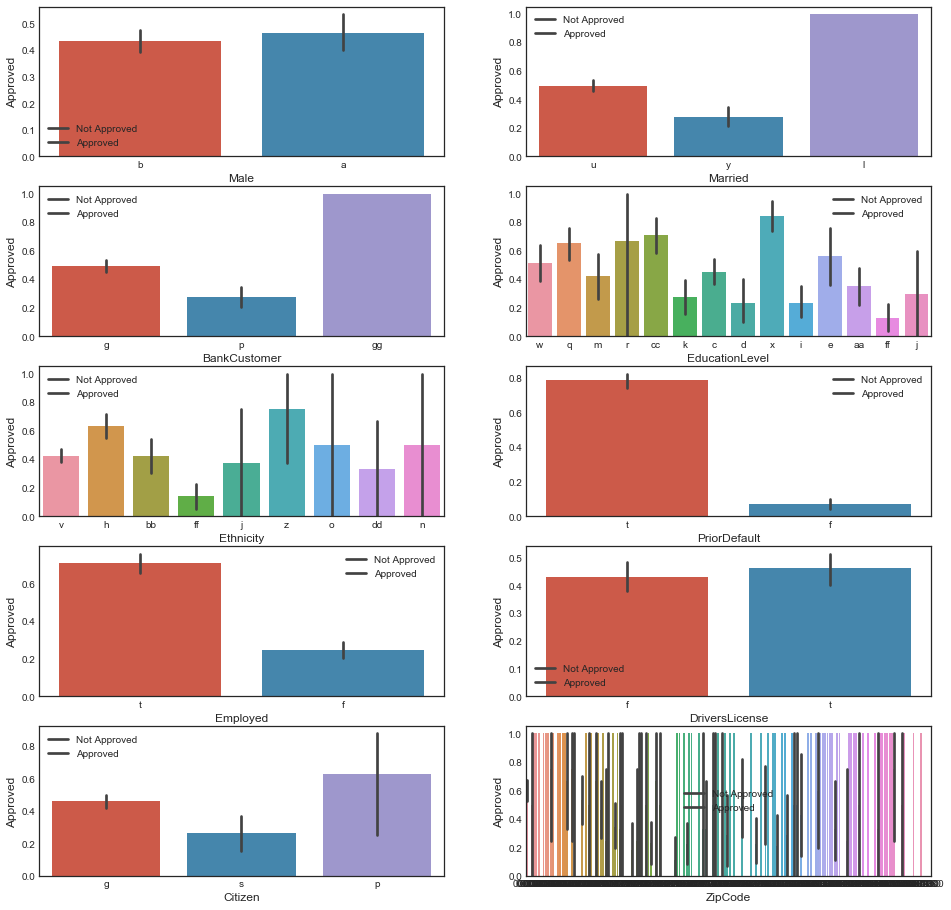

In [0]:
# 변수별 변수 분포 그래프
# Categorical value들을 가진 columns들 List로 만들고 1행당 그래프를 그린다
cat_cols = ['Male','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen','ZipCode']

fig, saxis = plt.subplots(5,2,figsize=(16,16))

for idx, col in enumerate(cat_cols):
  g = sns.barplot(x=col, y='Approved', data=dataset_fe, ax = saxis[int(idx/2), idx%2])
  g = g.legend(["Not Approved","Approved"])

plt.show()

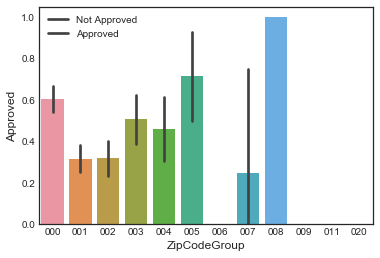

In [0]:
# Feature Engineering의 일환으로 ZipCode를 앞의 세자리로 나누어 하여 변수명 + group으로 열 추가 후 그래프 다시 그림
dataset_fe['ZipCodeGroup'] = dataset_fe['ZipCode'].str[:3].astype('str',copy=False)

plt.figure()
g = sns.barplot(x=dataset_fe['ZipCodeGroup'], y='Approved', data=dataset_fe)
g = g.legend(["Not Approved","Approved"])
plt.show()

In [0]:
# Select Drop Columns and Drop them
drop_column = ['Age','Debt','YearsEmployed', 'CreditScore','Income', 'ZipCode']
dataset_fe.drop(drop_column, axis=1, inplace = True)

In [0]:
# ZipCodeGroup을 범주형으로 변환
dataset_fe['ZipCodeGroup'] = dataset_fe['ZipCodeGroup'].astype('str')

In [0]:
# 컬럼 순서 변경
cols = dataset_fe.columns.tolist()
print(cols)
cols = [col for col in dataset_fe if col != 'Approved']+['Approved']
print(cols)
dataset_fe = dataset_fe[cols]

['Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Approved', 'Age_LN', 'Debt_LN', 'YearsEmployed_LN', 'CreditScore_LN', 'Income_LN', 'ZipCodeGroup']
['Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Age_LN', 'Debt_LN', 'YearsEmployed_LN', 'CreditScore_LN', 'Income_LN', 'ZipCodeGroup', 'Approved']


In [0]:
# 독립변수와 종속변수 분할
X_train = dataset_fe.iloc[:, :-1]
y_train = dataset_fe.iloc[:,-1:]

# cross validation 10 회 시행 준비
cv_split = ShuffleSplit(n_splits=10, test_size=.3, train_size =.6, random_state=42) # run model 10x with 60/30 split intentionally leaving out 10%

In [0]:
# Machine Learning 입력을 위한 변수 분리
num_attribs = [col for col in X_train.columns if X_train[col].dtype in ['int64','float64']]
cat_attribs = [col for col in X_train.columns if X_train[col].dtype not in ['int64','float64']]

print(num_attribs,'\n', cat_attribs)

['Age_LN', 'Debt_LN', 'YearsEmployed_LN', 'CreditScore_LN', 'Income_LN'] 
 ['Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCodeGroup']


In [0]:
# 범주형 변수 encoding
label = LabelEncoder()
for col in X_train[cat_attribs].columns:   
  X_train[col] = label.fit_transform(X_train[col])
  X_train = pd.get_dummies(X_train, columns =[col], prefix=col+"_lb")

In [0]:
verboseNo = 0

In [0]:
# Hyperparameter Tunning - SVC Model
svm_clf = svm.SVC(probability=True)
param_grid = {'kernel':['linear','rbf'], 'gamma': [1,2,3,'auto'],'decision_function_shape':['ovo','ovr']
              ,'shrinking':[True,False], 'random_state': [42]}
grid_svm = GridSearchCV(svm_clf, param_grid = param_grid, cv=cv_split, scoring="f1", n_jobs= -1, verbose = verboseNo)

grid_svm.fit(X_train, y_train)
grid_svm_best = grid_svm.best_estimator_
print(grid_svm_best)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)


In [0]:
# Hyperparameter Tunning - Decision Tree Model
dt_clf = tree.DecisionTreeClassifier(random_state=0)
param_grid = [
    {"max_depth": [None], "max_features": [10, 25, 50], "min_samples_split": [2, 3, 10], 
     "min_samples_leaf": [5, 10, 50, 100], "criterion": ["gini", "entropy"], 'random_state': [42]}
]
grid_dt = GridSearchCV(dt_clf, param_grid = param_grid, cv=cv_split, scoring="f1", n_jobs= -1, verbose = verboseNo)
grid_dt.fit(X_train, y_train)
grid_dt_best = grid_dt.best_estimator_
print(grid_dt_best)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [0]:
# Hyperparameter Tunning - Gradient boosting

# Cross validate model with Kfold stratified cross val
GB_clf = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],'n_estimators' : [50, 100, 200],'learning_rate': [0.25, 0.1, 0.05],
              'max_depth': [2,4,6], 'min_samples_leaf': [2, 5, 10], 'max_features': [1, 0.5, 0.25, 0.1],
             'random_state': [42]}

grid_GBC = GridSearchCV(GB_clf,param_grid = param_grid, cv=cv_split, scoring="f1", n_jobs= -1, verbose = verboseNo)
grid_GBC.fit(X_train,y_train)
grid_GBC_best = grid_GBC.best_estimator_
print(grid_GBC_best)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=2,
              max_features=0.25, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [0]:
# Random Forest Test
rf_clf = RandomForestClassifier(random_state=42)

param_grid = [
    {"max_depth": [None], "max_features": [1, 3, 10], "min_samples_split": [2, 3, 10], "min_samples_leaf": [1, 3, 10],
     "bootstrap": [False, True], "n_estimators" :[200,300,400], "criterion": ["gini", "entropy"], 'random_state': [42]}
]

grid_forest = GridSearchCV(rf_clf, param_grid, verbose = verboseNo)
grid_forest.fit(X_train, y_train)

grid_rf_clf_best = grid_forest.best_estimator_
print(grid_rf_clf_best)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=1,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)


In [0]:
# Hyperparameter Tunning - MLP(FeedForwardNetwork)

def create_model(optimizer='adam'):
  model = Sequential()
  
  # 첫 번째 Layer (Input layer)
  model.add(Dense(input_dim=57, init='glorot_uniform', activation='relu', output_dim=256))
  model.add(Dropout(0.3)) # 30% 정도를 Drop 
  
  # 두 번째 Layer (Hidden layer 1)
  model.add(Dense(output_dim=256, init='glorot_uniform', activation='relu'))
  model.add(Dropout(0.3)) # 30% 정도를 Drop 
  
  # 세 번째 Layer (Hidden layer 2)
  model.add(Dense(output_dim=256, init='glorot_uniform', activation='relu'))
  model.add(Dropout(0.3)) # 30% 정도를 Drop 
                      
  # 네 번째 Layer (Hidden layer 3)
  model.add(Dense(output_dim=256, init='glorot_uniform', activation='relu'))
  model.add(Dropout(0.3)) # 30% 정도를 Drop 
  
  # 다섯 번째 Layer (Output layer)
  model.add(Dense(output_dim=1))
  model.add(Activation("sigmoid"))
                      
  # Cost function 및 Optimizer 설정 # binary class 분류이므로 binary_crossentropy 사용 # Adam optimizer 사용
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

ffn_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=5, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['rmsprop','adam']

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)

grid_mlp = GridSearchCV(estimator=ffn_model, param_grid=param_grid, scoring = 'accuracy')
grid_mlp.fit(X_train,y_train)

grid_mlp_best = grid_mlp.best_estimator_
print(grid_mlp.best_params_)

{'optimizer': 'rmsprop', 'batch_size': 80, 'epochs': 10}


In [0]:
# 모델평가를 위한 변수 세팅
score_pram = ['accuracy', 'precision','recall','f1']

#Create Table to Compare Canonical Models
MA_Result_columns = ['ModelName','Dataset','Accuracy','Precision','Recall','F1']
MA_compare = pd.DataFrame(columns = MA_Result_columns)

#create table to compare Model predictions
MA_predict = pd.DataFrame(dataset["Approved"].values.reshape(-1,1))

In [0]:
Canonical_Models = [svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                            decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
                            max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001), 
                    tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                                                max_features=50, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                                min_impurity_split=None, min_samples_leaf=50, min_samples_split=2,
                                                min_weight_fraction_leaf=0.0, presort=False, random_state=42, 
                                                splitter='best'),]

In [0]:
#index through MLA and save performance to table
row_index = 0
# 알고리즘을 하나씩 꺼내면서 loop
for alg in Canonical_Models:
    #알고리즘의 이름은 할당하고, [row_index, MLA Name]에 이름을 넣고, [row_index, MLA Parameters]에 알고리즘의 파라미터들을 할당
    Model_Name = alg.__class__.__name__
    
    cv_results = cross_validate(alg, X_train, y_train, cv=10, scoring=score_pram, return_train_score=True)
    
    train_cnt = 0
    test_cnt = 0
    
    for i in list(cv_results.keys()):
      if("train" in i and train_cnt == 0):
        MA_compare.loc[row_index, 'ModelName'] = Model_Name
        MA_compare.loc[row_index, 'Dataset'] = "TrainSet"
        MA_compare.loc[row_index, 'Accuracy'] = format(cv_results['train_accuracy'].mean(), "10.4f")
        MA_compare.loc[row_index, 'Precision'] = format(cv_results['train_precision'].mean(), "10.4f")
        MA_compare.loc[row_index, 'Recall'] = format(cv_results['train_recall'].mean(), "10.4f")
        MA_compare.loc[row_index, 'F1'] = format(cv_results['train_f1'].mean(), "10.4f")
        row_index+=1
        train_cnt+=1
      elif("test" in i and test_cnt ==0):
        MA_compare.loc[row_index, 'ModelName'] = Model_Name
        MA_compare.loc[row_index, 'Dataset'] = "TestSet"
        MA_compare.loc[row_index, 'Accuracy'] = format(cv_results['test_accuracy'].mean(), "10.4f")
        MA_compare.loc[row_index, 'Precision'] = format(cv_results['test_precision'].mean(), "10.4f")
        MA_compare.loc[row_index, 'Recall'] = format(cv_results['test_recall'].mean(), "10.4f")
        MA_compare.loc[row_index, 'F1'] = format(cv_results['test_f1'].mean(), "10.4f")
        row_index+=1
        test_cnt+=1
    
    alg.fit(X_train, y_train)
    MA_predict[Model_Name] = alg.predict(X_train)

In [0]:
Committee_Models = [GradientBoostingClassifier(criterion='friedman_mse', init=None,learning_rate=0.05, loss='deviance', 
                                               max_depth=2,max_features=0.25, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                               min_impurity_split=None, min_samples_leaf=2, min_samples_split=2,
                                               min_weight_fraction_leaf=0.0, n_estimators=50, n_iter_no_change=None, 
                                               presort='auto', random_state=42, subsample=1.0, tol=0.0001, 
                                               validation_fraction=0.1, verbose=0, warm_start=False),
                    RandomForestClassifier(bootstrap=False, class_weight=None,criterion='entropy', max_depth=None, 
                                           max_features=1,max_leaf_nodes=None, min_impurity_decrease=0.0,
                                           min_impurity_split=None, min_samples_leaf=3, min_samples_split=2, 
                                           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None, oob_score=False,
                                           random_state=42, verbose=0, warm_start=False),]

In [0]:
for alg in Committee_Models:

    #set name and parameters
    #알고리즘의 이름은 할당하고, [row_index, MLA Name]에 이름을 넣고, [row_index, MLA Parameters]에 알고리즘의 파라미터들을 할당
    Model_Name = alg.__class__.__name__
    
    cv_results = cross_validate(alg, X_train, y_train, cv=10, scoring=score_pram, return_train_score=True)
    
    train_cnt = 0
    test_cnt = 0
    
    for i in list(cv_results.keys()):
      if("train" in i and train_cnt == 0):
        MA_compare.loc[row_index, 'ModelName'] = Model_Name
        MA_compare.loc[row_index, 'Dataset'] = "TrainSet"
        MA_compare.loc[row_index, 'Accuracy'] = format(cv_results['train_accuracy'].mean(), "10.4f")
        MA_compare.loc[row_index, 'Precision'] = format(cv_results['train_precision'].mean(), "10.4f")
        MA_compare.loc[row_index, 'Recall'] = format(cv_results['train_recall'].mean(), "10.4f")
        MA_compare.loc[row_index, 'F1'] = format(cv_results['train_f1'].mean(), "10.4f")
        row_index+=1
        train_cnt+=1
      elif("test" in i and test_cnt ==0):
        MA_compare.loc[row_index, 'ModelName'] = Model_Name
        MA_compare.loc[row_index, 'Dataset'] = "TestSet"
        MA_compare.loc[row_index, 'Accuracy'] = format(cv_results['test_accuracy'].mean(), "10.4f")
        MA_compare.loc[row_index, 'Precision'] = format(cv_results['test_precision'].mean(), "10.4f")
        MA_compare.loc[row_index, 'Recall'] = format(cv_results['test_recall'].mean(), "10.4f")
        MA_compare.loc[row_index, 'F1'] = format(cv_results['test_f1'].mean(), "10.4f")
        row_index+=1
        test_cnt+=1

    alg.fit(X_train, y_train)
    MA_predict[Model_Name] = alg.predict(X_train)

In [0]:
# Deep Learning 평가를 위한 평가 함수 정의
from keras import backend as K

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [0]:
# MLP 시행
train_cvscores = []
test_cvscores = []

fold_no = 0
training_epochs = 10
batch_size = 60
optimizer = 'rmsprop'

kfold = ShuffleSplit(n_splits=10, test_size = 0.3, train_size = 0.6, random_state =42)

# glorot_uniform == Xavier Initialization, keras에서는 내부적으로 이미 제공

for train, test in kfold.split(X_train, y_train):
#   print("# No of Fold : ", fold_no)
  ffn_model = Sequential()
  
  # 첫 번째 Layer (Input layer)
  ffn_model.add(Dense(input_dim=57, init='glorot_uniform', activation='relu', output_dim=256))
  ffn_model.add(Dropout(0.3)) # 30% 정도를 Drop 
  
  # 두 번째 Layer (Hidden layer 1)
  ffn_model.add(Dense(output_dim=256, init='glorot_uniform', activation='relu'))
  ffn_model.add(Dropout(0.3)) # 30% 정도를 Drop 
  
  # 세 번째 Layer (Hidden layer 2)
  ffn_model.add(Dense(output_dim=256, init='glorot_uniform', activation='relu'))
  ffn_model.add(Dropout(0.3)) # 30% 정도를 Drop 
                      
  # 네 번째 Layer (Hidden layer 3)
  ffn_model.add(Dense(output_dim=256, init='glorot_uniform', activation='relu'))
  ffn_model.add(Dropout(0.3)) # 30% 정도를 Drop 
  
  # 다섯 번째 Layer (Output layer)
  ffn_model.add(Dense(output_dim=1))
  ffn_model.add(Activation("sigmoid"))
                      
  # Cost function 및 Optimizer 설정 # binary class 분류이므로 binary_crossentropy 사용 # Adam optimizer 사용
  ffn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', precision, recall, f1score])
                      
  # model training
  hist = ffn_model.fit(X_train.iloc[train], y_train.iloc[train], epochs=training_epochs, batch_size=batch_size, verbose=verboseNo)
  train_scores = ffn_model.evaluate(X_train.iloc[train],y_train.iloc[train], verbose=verboseNo)
  train_cvscores.append(train_scores)

  test_scores = ffn_model.evaluate(X_train.iloc[test],y_train.iloc[test], verbose=verboseNo)  
  test_cvscores.append(test_scores)
  
  fold_no += 1

print("\n ############## Summary Print ############### \n")
print("train_cvscores : ", train_cvscores)
# train_cvscores = np.array(train_cvscores)
print("test_cvscores : ", test_cvscores)


In [0]:
MA_compare.loc[row_index, 'ModelName'] = 'MLP(FFN)'
MA_compare.loc[row_index, 'Dataset'] = "TestSet"
MA_compare.loc[row_index, 'Accuracy'] = format(np.mean(test_cvscores, axis=0)[1], "10.4f")
MA_compare.loc[row_index, 'Precision'] = format(np.mean(test_cvscores, axis=0)[2], "10.4f")
MA_compare.loc[row_index, 'Recall'] = format(np.mean(test_cvscores, axis=0)[3], "10.4f")
MA_compare.loc[row_index, 'F1'] = format(np.mean(test_cvscores, axis=0)[1], "10.4f")
row_index+=1

MA_compare.loc[row_index, 'ModelName'] = 'MLP(FFN)'
MA_compare.loc[row_index, 'Dataset'] = "TrainSet"
MA_compare.loc[row_index, 'Accuracy'] = format(np.mean(train_cvscores, axis=0)[1], "10.4f")
MA_compare.loc[row_index, 'Precision'] = format(np.mean(train_cvscores, axis=0)[2], "10.4f")
MA_compare.loc[row_index, 'Recall'] = format(np.mean(train_cvscores, axis=0)[3], "10.4f")
MA_compare.loc[row_index, 'F1'] = format(np.mean(train_cvscores, axis=0)[4], "10.4f")
row_index+=1

In [0]:
MA_compare

,ModelName,Dataset,Accuracy,Precision,Recall,F1
0,SVC,TestSet,0.8555,0.8568,0.9251,0.8712
1,SVC,TrainSet,0.8551,0.7880,0.9251,0.8506
2,DecisionTreeClassifier,TestSet,0.8090,0.8537,0.8176,0.8101
3,DecisionTreeClassifier,TrainSet,0.8609,0.8480,0.8378,0.8422
4,GradientBoostingClassifier,TestSet,0.8408,0.8649,0.8826,0.8500
5,GradientBoostingClassifier,TrainSet,0.8781,0.8390,0.8990,0.8678
6,RandomForestClassifier,TestSet,0.8565,0.9227,0.7556,0.8216
7,RandomForestClassifier,TrainSet,0.8934,0.9476,0.8049,0.8703
8,MLP(FFN),TestSet,0.8628,0.8554,0.8440,0.8628
9,MLP(FFN),TrainSet,0.9133,0.8919,0.9102,0.8969
